In [201]:
#필요한 모듈 불러오기
from pandas import DataFrame, Series
import numpy as np
import pandas as pd
import matplotlib  as mpl
import matplotlib.pyplot as plt
import os
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectPercentile
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.base import clone
from itertools import combinations
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
import statsmodels as sm
%matplotlib inline
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [244]:
#데이터 불러오기 
df = pd.read_csv('data\schedulingData.csv')
df = df.drop(df.columns[0], axis=1)   #drop first variable (index)
numrow, numcol = df.shape
df.head()

,Protocol,Compounds,InputFields,Iterations,NumPending,Hour,Day,Class
0,E,997,137,20,0,14.000000,Tue,F
1,E,97,103,20,0,13.816667,Tue,VF
2,E,101,75,10,0,13.850000,Thu,VF
3,E,93,76,20,0,10.100000,Fri,VF
4,E,100,82,20,0,10.366667,Fri,VF


In [245]:
df.describe()

,Compounds,InputFields,Iterations,NumPending,Hour
count,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000
mean,497.742092,1537.055414,29.243593,53.389287,13.733760
std,1020.173220,3650.076483,34.417441,355.956566,3.981058
min,20.000000,10.000000,10.000000,0.000000,0.016667
25%,98.000000,134.000000,20.000000,0.000000,10.900000
50%,226.000000,426.000000,20.000000,0.000000,14.016667
75%,448.000000,991.000000,20.000000,0.000000,16.600000
max,14103.000000,56671.000000,200.000000,5605.000000,23.983333


In [246]:
# getting dummies for categorical variables
X = pd.get_dummies(df[['Protocol', 'Compounds', 'InputFields', 'Iterations', 'NumPending', 'Hour', 'Day']], drop_first = True)
X.describe()

,Compounds,InputFields,Iterations,NumPending,Hour,Protocol_C,Protocol_D,Protocol_E,Protocol_F,Protocol_G,...,Protocol_L,Protocol_M,Protocol_N,Protocol_O,Day_Mon,Day_Sat,Day_Sun,Day_Thu,Day_Tue,Day_Wed
count,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,...,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000
mean,497.742092,1537.055414,29.243593,53.389287,13.733760,0.036943,0.034403,0.022166,0.039252,0.035789,...,0.055876,0.104133,0.123759,0.134149,0.159778,0.007389,0.037174,0.166243,0.207804,0.208497
std,1020.173220,3650.076483,34.417441,355.956566,3.981058,0.188644,0.182283,0.147239,0.194216,0.185784,...,0.229709,0.305468,0.329344,0.340852,0.366443,0.085649,0.189209,0.372342,0.405783,0.406281
min,20.000000,10.000000,10.000000,0.000000,0.016667,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,98.000000,134.000000,20.000000,0.000000,10.900000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,226.000000,426.000000,20.000000,0.000000,14.016667,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,448.000000,991.000000,20.000000,0.000000,16.600000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,14103.000000,56671.000000,200.000000,5605.000000,23.983333,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [247]:
X.columns

Index(['Compounds', 'InputFields', 'Iterations', 'NumPending', 'Hour',
       'Protocol_C', 'Protocol_D', 'Protocol_E', 'Protocol_F', 'Protocol_G',
       'Protocol_H', 'Protocol_I', 'Protocol_J', 'Protocol_K', 'Protocol_L',
       'Protocol_M', 'Protocol_N', 'Protocol_O', 'Day_Mon', 'Day_Sat',
       'Day_Sun', 'Day_Thu', 'Day_Tue', 'Day_Wed'],
      dtype='object')

In [5]:
### There are a lot of zeros and the distribution is skewed. We add
### one so that we can log transform the data
X.NumPending = X.NumPending + 1
X.describe()

,Compounds,InputFields,Iterations,NumPending,Hour,Protocol_C,Protocol_D,Protocol_E,Protocol_F,Protocol_G,...,Protocol_L,Protocol_M,Protocol_N,Protocol_O,Day_Mon,Day_Sat,Day_Sun,Day_Thu,Day_Tue,Day_Wed
count,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,...,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000
mean,497.742092,1537.055414,29.243593,54.389287,13.733760,0.036943,0.034403,0.022166,0.039252,0.035789,...,0.055876,0.104133,0.123759,0.134149,0.159778,0.007389,0.037174,0.166243,0.207804,0.208497
std,1020.173220,3650.076483,34.417441,355.956566,3.981058,0.188644,0.182283,0.147239,0.194216,0.185784,...,0.229709,0.305468,0.329344,0.340852,0.366443,0.085649,0.189209,0.372342,0.405783,0.406281
min,20.000000,10.000000,10.000000,1.000000,0.016667,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,98.000000,134.000000,20.000000,1.000000,10.900000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,226.000000,426.000000,20.000000,1.000000,14.016667,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,448.000000,991.000000,20.000000,1.000000,16.600000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,14103.000000,56671.000000,200.000000,5606.000000,23.983333,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
X['Compounds'] = np.log(X.Compounds)
X['InputFields'] = np.log(X.InputFields)
X['Iterations'] = np.log(X.Iterations)
X['NumPending'] = np.log(X.NumPending)

In [22]:
df[df.Protocol=='A']

,Protocol,Compounds,InputFields,Iterations,NumPending,Hour,Day,Class
96,A,120,338,20,3340,13.250000,Mon,F
97,A,130,397,20,160,16.800000,Fri,F
98,A,129,373,20,118,10.666667,Mon,F
99,A,141,373,20,92,9.433333,Mon,VF
100,A,134,113,20,0,9.566667,Mon,VF
101,A,135,165,20,281,9.516667,Mon,VF
102,A,130,311,20,112,9.483333,Mon,VF
103,A,135,369,20,160,9.516667,Mon,VF
104,A,139,22,20,82,9.533333,Mon,VF
105,A,152,392,10,1,15.166667,Wed,VF


In [251]:
mpl.rcParams['figure.figsize'] = (10, 10)

In [91]:
dic = {
    'VF':'brown',
    'F':'olivedrab',
    'M':'slategrey',
    'L':'orange'
    }
dic.values()

dict_values(['brown', 'olivedrab', 'slategrey', 'orange'])

In [148]:
colors = [col for col in dic.values()]
groups = [gr for gr in dic.keys()]
markers = ["o", "s", "^", "D"]
prot = np.unique(df['Protocol'])

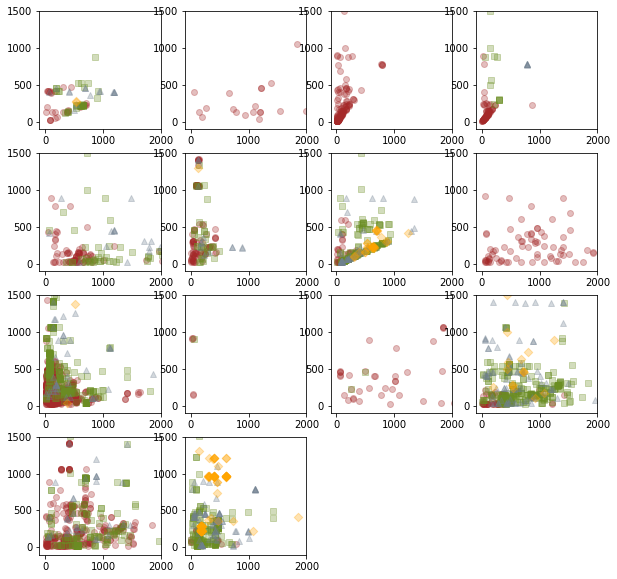

In [139]:
for i in range(14):
    plt.subplot(4,4,i+1)
    for gr, col, m in zip(groups, colors, markers):
        plt.scatter(df[(df.Protocol==prot[i])&(df.Class==gr)].InputFields, df[(df.Protocol==prot[i])&(df.Class==gr)].Compounds, c = col, label = gr, marker=m, alpha=0.3) 
    plt.xlim(-10**2, 2*10**3)
    plt.ylim(-10**2, 1.5*10**3)
plt.show()

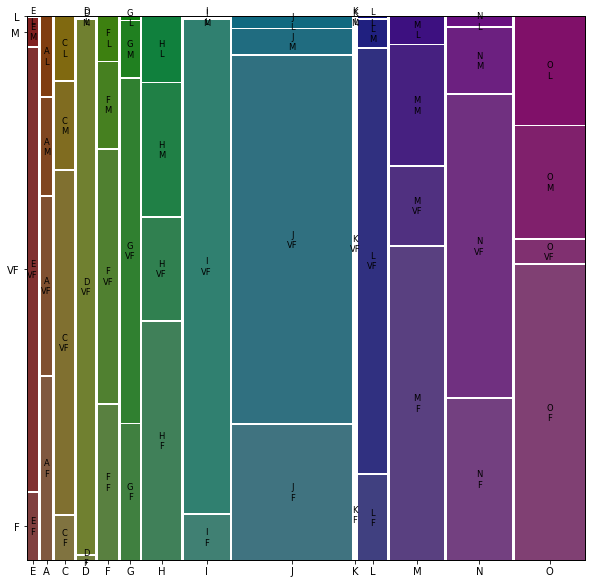

In [252]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(df, ['Protocol', 'Class'])
plt.show()

In [310]:
from sklearn.preprocessing import LabelEncoder

# Label encoding with sklearn's LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['Class'].values)
y

array([0, 3, 3, ..., 1, 1, 2], dtype=int64)

In [312]:
## Split the data
np.random.seed(5*11+7)

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.2, 
                     random_state=0, 
                     stratify=y)

In [313]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

print(np.mean(X_train_std), np.std(X_train_std))

-2.662313103700818e-17 1.0


### Perceptron

In [314]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
        
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=1) # eta0 : learning step size
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=None, n_iter=40, n_jobs=1, penalty=None, random_state=1,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [315]:
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 303


In [316]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.65


In [296]:
print('Accuracy: %.2f' % ppn.score(X_test_std, y_test))

Accuracy: 0.65


In [297]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

In [159]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.savefig('images/Perceptron.png', dpi=300)
plt.show()

ValueError: X has 2 features per sample; expecting 24

### 특성 자동 선택 selectpercentile 이용

X_train_noise.shape: (3464, 24)
X_train_selected.shape: (3464, 12)
[ True False  True  True False  True  True False False False  True  True
  True False  True  True False  True False False  True False False False]


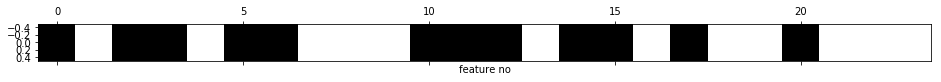

노이즈가 잘 제거됨을 확인할 수 있다!


In [298]:
# 특성 자동 선택
from sklearn.feature_selection import SelectPercentile

select = SelectPercentile(percentile=50)  # 50%의 feature만 남긴다.
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)

print("X_train_noise.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

mask = select.get_support()
print(mask) # 선택된 특성
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("feature no")
plt.show()

print("노이즈가 잘 제거됨을 확인할 수 있다!")

# 주로 random 하게 생성된 노이즈 변수들이 제거됨

In [299]:
X_test_selected = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train_std, y_train)
print("전체 특성을 사용한 점수: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("선택된 일부 특성을 사용한 점수: {:.3f}".format(lr.score(X_test_selected, y_test)))

전체 특성을 사용한 점수: 0.066
선택된 일부 특성을 사용한 점수: 0.706


### 모델 기반 특성 선택

In [261]:
X_train.shape[1]

24

Index(['Compounds', 'InputFields', 'Iterations', 'NumPending', 'Hour',
       'Protocol_C', 'Protocol_D', 'Protocol_E', 'Protocol_F', 'Protocol_G',
       'Protocol_H', 'Protocol_I', 'Protocol_J', 'Protocol_K', 'Protocol_L',
       'Protocol_M', 'Protocol_N', 'Protocol_O', 'Day_Mon', 'Day_Sat',
       'Day_Sun', 'Day_Thu', 'Day_Tue', 'Day_Wed'],
      dtype='object')
 1) Compounds                      0.224958
 2) InputFields                    0.189583
 3) Hour                           0.139329
 4) NumPending                     0.079584
 5) Iterations                     0.078087
 6) Protocol_O                     0.059799
 7) Protocol_M                     0.041754
 8) Protocol_H                     0.026403
 9) Protocol_I                     0.024139
10) Protocol_J                     0.017370
11) Day_Tue                        0.015062
12) Protocol_N                     0.014649
13) Day_Wed                        0.014174
14) Day_Mon                        0.012882
15) Day_Thu   

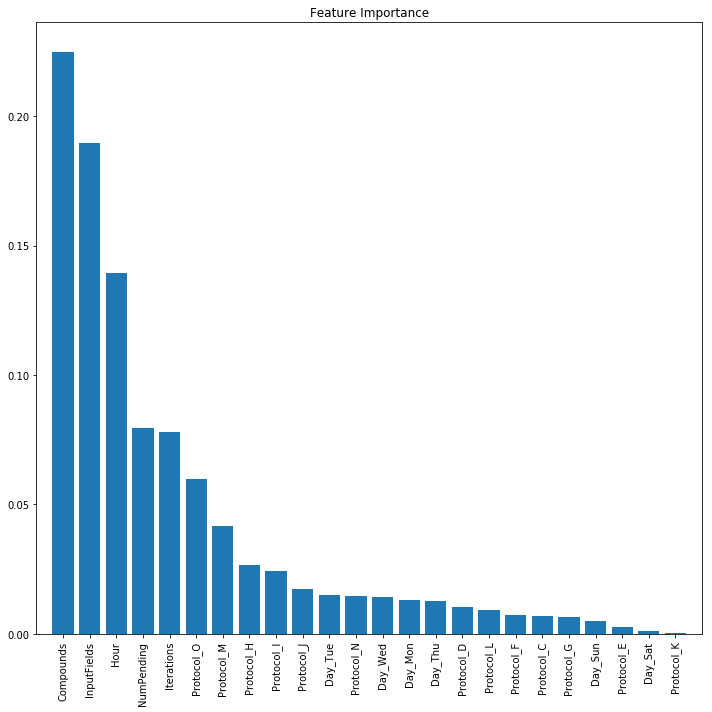

In [300]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = X.columns[:]
print(feat_labels) ## 입력 변수들
forest = RandomForestClassifier(n_estimators=500, ## tree 수
                                random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_   # feature 중요성 값

indices = np.argsort(importances)[::-1]   # 역순(큰 순서로)

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))   # 출력 양식

plt.title('Feature Importance')
# bar 모양 그래프 plot
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')
# feature 이름 삽입
plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [301]:
from sklearn.feature_selection import SelectFromModel
# 학습된 모델로 부터 0.05 이상인 변수들을 선택함
sfm = SelectFromModel(forest, threshold=0.05, prefit=True)
X_selected = sfm.transform(X_train)
print('Number of samples that meet this criterion:', 
      X_selected.shape[0])
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

Number of samples that meet this criterion: 3464
 1) Compounds                      0.224958
 2) InputFields                    0.189583
 3) Hour                           0.139329
 4) NumPending                     0.079584
 5) Iterations                     0.078087
 6) Protocol_O                     0.059799


### 반복적 특성 선택

In [264]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.2, random_state=1):
        self.scoring = scoring # 선택 기준함수 scoring(y_test, y_pred)
        self.estimator = clone(estimator)
        self.k_features = k_features # 선택되는 특성의 수
        self.test_size = test_size # 시험 데이터의 비율
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]   # feature 개수
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]   # [0, 1, 2,…]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)   # 모든 feature 있을 때 score 계산
        self.scores_ = [score]

        while dim > self.k_features:   # 목표한 feature 수에 도달할때까지
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):   # 하나 뺐을 때 가능한 조합
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]   # score를 최대로 하는 조합
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]   # k개 feature이 되었을 때 최종 score

        return self
    
    # feature selection 후의 데이터를 보여주는 함수
    def transform(self, X):
        return X[:, self.indices_]
    
    # 각 단계에서의 score를 계산해주는 함수
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

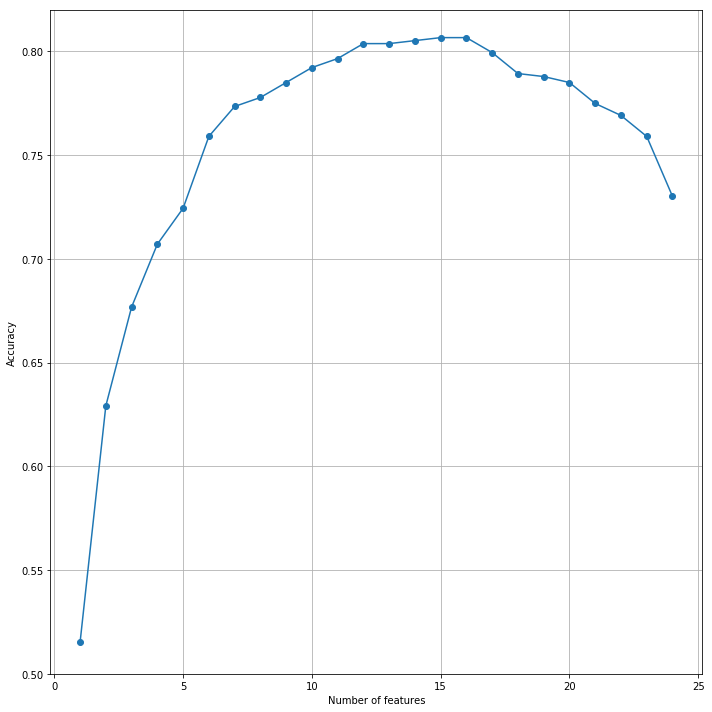

In [265]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# feature가 하나 남을때까지 알고리즘 실행
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

# 각 단계에서 남은 feature 개수
k_feat = [len(k) for k in sbs.subsets_]

# 남은 feature 개수에 따른 score 플롯
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.5, 0.82])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

### SVM

In [317]:
from sklearn.model_selection import cross_val_score
clf = SVC(kernel='linear', C=1)
scores = cross_val_score(clf, X_train_std, y_train, cv=5)
scores

array([0.72374101, 0.72622478, 0.72687861, 0.69219653, 0.69319826])

In [318]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
svm.score(X_train_std, y_train)

0.7176674364896074

In [319]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_train_std, y_train)
svm.score(X_train_std, y_train)

0.8420900692840647

### Multiclass classifier

In [320]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0))
ovo_clf.fit(X_train_std, y_train)
ovo_clf.predict(X_test_std)

array([0, 0, 3, 3, 0, 3, 3, 2, 0, 0, 3, 0, 0, 0, 2, 3, 0, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 0, 0, 3, 0, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 0, 0, 3, 3,
       0, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3, 3, 3, 3,
       0, 0, 0, 2, 3, 0, 1, 3, 3, 0, 2, 3, 0, 0, 2, 2, 3, 3, 3, 3, 3, 1,
       3, 3, 0, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3, 1, 3, 0,
       0, 3, 3, 0, 0, 3, 0, 0, 3, 3, 3, 0, 0, 3, 0, 3, 2, 0, 3, 2, 3, 0,
       3, 0, 0, 3, 3, 3, 3, 0, 3, 0, 3, 2, 3, 0, 3, 0, 0, 2, 3, 0, 3, 0,
       3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 0, 0, 0, 3, 0, 3, 0, 3, 3, 0, 3, 3,
       3, 0, 3, 3, 0, 0, 3, 3, 3, 0, 3, 3, 3, 2, 3, 0, 3, 3, 3, 3, 3, 0,
       3, 0, 0, 0, 3, 3, 3, 0, 0, 3, 3, 3, 2, 2, 2, 3, 3, 0, 1, 0, 3, 0,
       3, 0, 3, 2, 3, 0, 2, 2, 3, 1, 1, 1, 3, 3, 3, 0, 3, 3, 0, 3, 3, 0,
       0, 2, 3, 0, 2, 3, 0, 3, 3, 0, 3, 3, 3, 0, 3, 0, 1, 3, 3, 3, 0, 3,
       0, 0, 0, 0, 2, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 1,
       0, 0, 0, 2, 0, 0, 3, 0, 0, 0, 3, 3, 3, 3, 3,

In [ ]:
# cost function
cost = np.sum((y_test - y_pred)**2)
if y_pred == 0 & y_test == 1:
    10*np.sum(y_test - y_pred)**2

# 성훈찡

In [202]:
cost_matrix = np.array([[0, 1, 5, 10], [1, 0, 5, 5], [1,1,0,1],[1,1,1,0]])
cost_matrix

array([[ 0,  1,  5, 10],
       [ 1,  0,  5,  5],
       [ 1,  1,  0,  1],
       [ 1,  1,  1,  0]])

# 1. Perceptron

In [321]:
ppn = Perceptron(n_iter=100, eta0=0.1, random_state=1) # eta0 : learning step size
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)

In [323]:
##Confusion Matrix - cfm = confusion_matrix(y참값, y예측값)
cfm = confusion_matrix(y_test, y_pred)
print(cfm)
total_cost = np.multiply(cfm, cost_matrix).sum()
print('Total Cost: %d'%total_cost)

[[ 90  15  65 100]
 [ 11  29   7   5]
 [ 26  17  35  25]
 [ 16   0  20 406]]
Total Cost: 1515


In [324]:
##정확도 계산 - 왜 다르지? ㅅㅂ 
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
# print('Accuracy: %.2f' % ppn.score(X_test_std, y_pred))
##kappa score (합치도 ?)
print('Kappa Score: %.2f'%cohen_kappa_score(y_test,y_pred))

Accuracy: 0.65
Kappa Score: 0.42


# 2. Logistic Regression

In [269]:
lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_std, y_train)
y_pred = lr.predict(X_test_std)

In [270]:
#Confusion Matrix - cfm = confusion_matrix(y참값, y예측값)
cfm = confusion_matrix(y_test, y_pred)
print(cfm)
# Apply element-wise multiplication: 쨔아아아아아아앙아아아스!
total_cost = np.multiply(cfm, cost_matrix).sum()
print('Total Cost: %d'%total_cost)

[[180   2   5  83]
 [ 20  31   1   0]
 [ 61   7  20  15]
 [ 31   1   2 408]]
Total Cost: 999


In [271]:
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
##kappa score (합치도 ?)
print('Kappa Score: %.2f'%cohen_kappa_score(y_test,y_pred))

Accuracy: 0.74
Kappa Score: 0.55


# 3. PLS

In [403]:
from patsy import ModelDesc, Term, EvalFactor

In [406]:
desc = ModelDesc.from_formula("y ~ (a+b)**2")
desc.describe()

'y ~ a + b + a:b'

In [407]:
data = 

NameError: name 'dmatrices' is not defined

In [ ]:
# squared terms 사용


In [380]:
# Processing y into one-hot vectors
from sklearn.preprocessing import OneHotEncoder

y.shape = (4331, 1)
y

array([[0],
       [3],
       [3],
       ...,
       [1],
       [1],
       [2]], dtype=int64)

In [381]:
one = OneHotEncoder() # 몇 번째 열에 해당하는 feature가 categorical feature인지.
y_one = one.fit_transform(y).toarray()
y_one

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]])

In [382]:
y_train.shape = (3464, 1)
y_test.shape = (867, 1)
y_one_train = one.fit_transform(y_train).toarray()
y_one_test = one.fit_transform(y_test).toarray()

In [397]:
# now fit and predict PLS
pls = PLSCanonical(n_components = 2, algorithm='svd')
pls.fit(X_train_std, y_one_train)
y_pred_pls_probs = pls.predict(X_test_std)
y_pred_pls_probs

array([[-0.00493271,  0.33383709,  0.7722877 , -0.10119208],
       [ 0.92123858,  0.28797861, -0.04947159, -0.1597456 ],
       [ 0.39120662, -0.0963676 ,  0.10751699,  0.59764398],
       ...,
       [ 0.35555279,  0.03373531, -0.18358725,  0.79429914],
       [-0.37798955,  0.38382375,  0.38083186,  0.61333395],
       [ 0.34314897, -0.0019509 ,  0.08758631,  0.57121562]])

In [398]:
y_pred_pls_probs.shape

(867, 4)

In [399]:
npred = y_pred_pls.shape[0]

In [400]:
y_pred_pls = np.zeros(npred)

for i in range(npred):
    y_pred_pls[i] = list(y_pred_pls_probs[i,:]).index(max(y_pred_pls_probs[i,:]))
#     y_pred_pls_one[i,index[i]] = 1
y_pred_pls

array([2., 0., 3., 3., 2., 3., 3., 2., 1., 0., 3., 1., 0., 1., 2., 3., 0.,
       0., 3., 3., 3., 3., 3., 3., 3., 3., 1., 0., 3., 0., 3., 3., 3., 3.,
       3., 3., 0., 3., 3., 0., 0., 0., 3., 3., 0., 3., 3., 0., 3., 3., 0.,
       3., 3., 3., 3., 3., 3., 2., 3., 2., 3., 0., 3., 3., 0., 3., 0., 0.,
       3., 1., 3., 0., 0., 3., 3., 0., 0., 3., 0., 0., 2., 0., 3., 3., 3.,
       3., 3., 0., 3., 3., 0., 3., 3., 3., 3., 0., 3., 3., 3., 3., 3., 0.,
       3., 2., 2., 0., 0., 0., 3., 0., 0., 3., 3., 0., 0., 3., 0., 3., 3.,
       3., 3., 0., 0., 3., 3., 3., 2., 2., 3., 3., 3., 0., 3., 0., 0., 3.,
       3., 3., 3., 0., 3., 0., 3., 3., 3., 0., 3., 0., 0., 3., 3., 0., 3.,
       3., 3., 0., 3., 3., 3., 0., 0., 3., 3., 3., 0., 0., 0., 3., 0., 3.,
       3., 3., 3., 0., 3., 3., 3., 1., 3., 3., 3., 0., 3., 3., 3., 0., 3.,
       3., 3., 1., 3., 0., 3., 3., 3., 3., 3., 0., 3., 3., 2., 3., 3., 0.,
       3., 3., 0., 0., 3., 3., 0., 2., 2., 3., 3., 3., 2., 0., 3., 0., 3.,
       0., 3., 1., 3., 0.

In [401]:
# confusion matrix
cfm = confusion_matrix(y_test, y_pred_pls)
cfm

array([[162,   4,  12,  92],
       [ 23,  10,  12,   7],
       [ 42,   6,  29,  26],
       [ 42,   0,   2, 398]], dtype=int64)

In [402]:
total_cost = np.multiply(cfm, cost_matrix).sum()
print('Total Cost: %d'%total_cost)

Total Cost: 1220


# 4. FDA